<a href="https://colab.research.google.com/github/AnSaradar/AI_Projects/blob/main/Copy_of_Olymbics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/Datasets/athlete_events.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
data.shape

(271116, 15)

In [ ]:

data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

We Notice that only 4 columns have Null Value , but for the "Medal" Columm it is ok to have Null value because only the top 3 players got medals , for the other 3 columns we can replace the Null value with the median value for the column.

In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Height'] = data['Height'].fillna(data['Height'].median())
data['Weight'] = data['Weight'].fillna(data['Weight'].median())
data['Medal'] = data['Medal'].fillna('No_Medal')

In [ ]:
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

Lets say the the distribution of each {Weight , Height , Age } Which we expect to be Normal Ditribution .

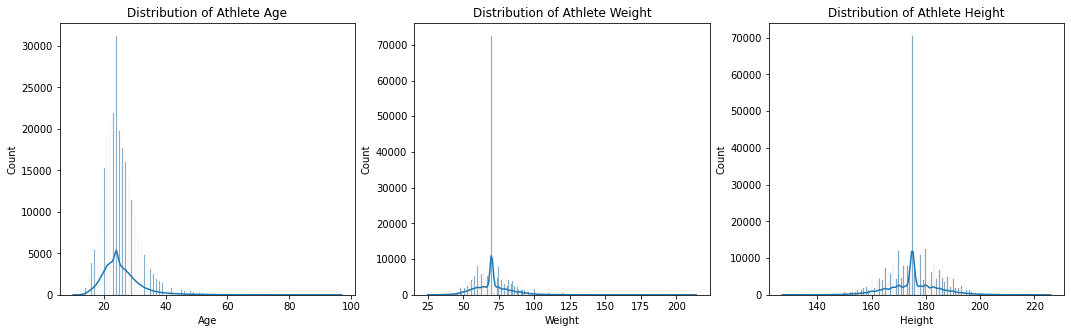

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=data, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Athlete Age')

plt.subplot(1, 3, 2)
sns.histplot(data=data, x='Weight', kde=True)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Distribution of Athlete Weight')

plt.subplot(1, 3, 3)
sns.histplot(data=data, x='Height', kde=True)
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Distribution of Athlete Height')

plt.show()

Women Vs Men 

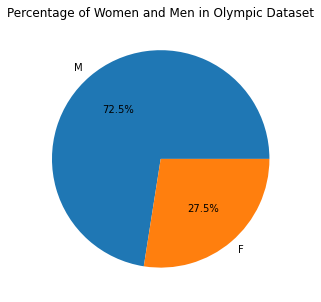

In [ ]:
gender_counts = data['Sex'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',)
plt.title('Percentage of Women and Men in Olympic Dataset')
plt.show()

Partecipation for men and women over the years 

We Notice that the Women Participation has been increasing over the years 

In [ ]:
gender_counts = data.groupby(['Year', 'Sex'])['Name'].count().reset_index()
gender_counts.columns = ['Year', 'Sex', 'Count']

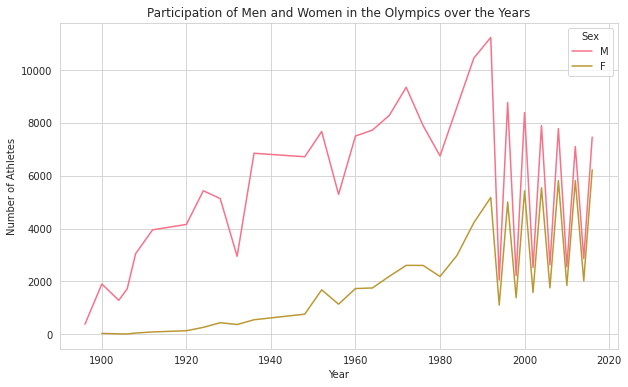

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.figure(figsize=(10,6))

sns.lineplot(data=gender_counts, x='Year', y='Count', hue='Sex',)

plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Participation of Men and Women in the Olympics over the Years')
plt.show()

Cities host Olymbics 

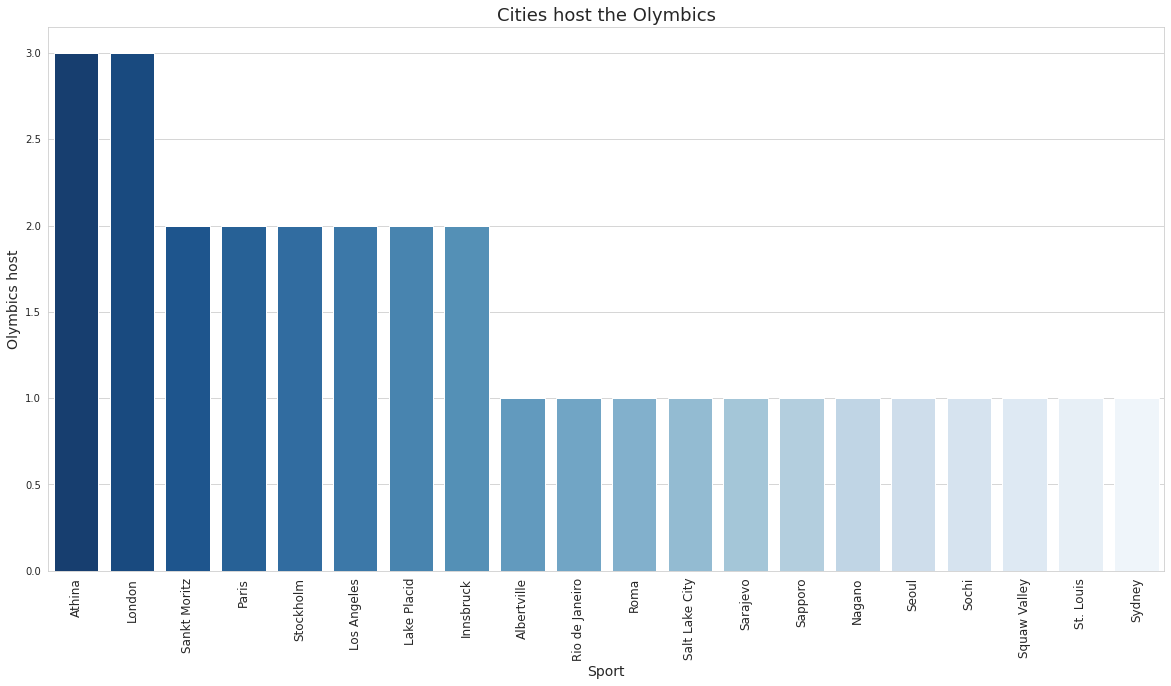

In [ ]:
cities_host = data.groupby('City')['Year'].nunique().reset_index(name='City hosting Count')

cities_host = cities_host.sort_values(by='City hosting Count', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(data=cities_host.head(20), x='City', y='City hosting Count', palette='Blues_r')
plt.xlabel('Sport', fontsize=14)
plt.ylabel('Olymbics host', fontsize=14)
plt.title('Cities host the Olymbics', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.show()

The Number of Medals for each Country

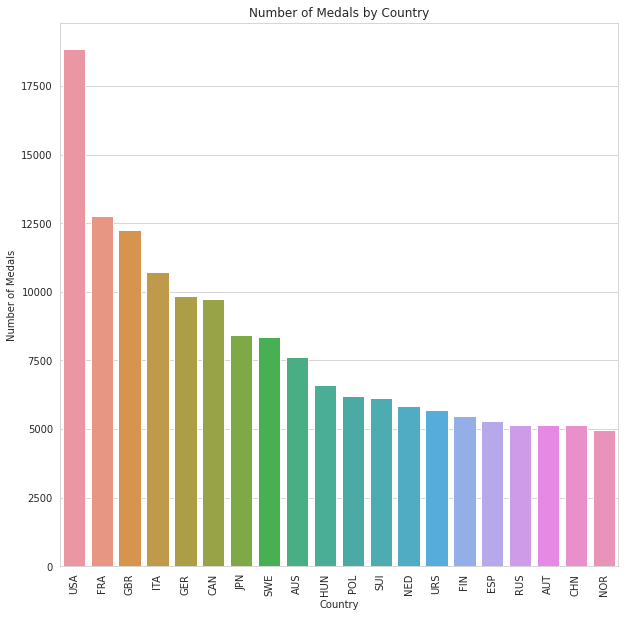

In [ ]:
medal_count = data.groupby('NOC')['Medal'].count().reset_index()
medal_count.columns = ['Country', 'Medal Count']
medal_count = medal_count.sort_values('Medal Count', ascending=False)[:20]
plt.figure(figsize=(10, 10))
sns.barplot(data=medal_count, x='Country', y='Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.title('Number of Medals by Country')
plt.show()

The Number of Gold Medals for each Country

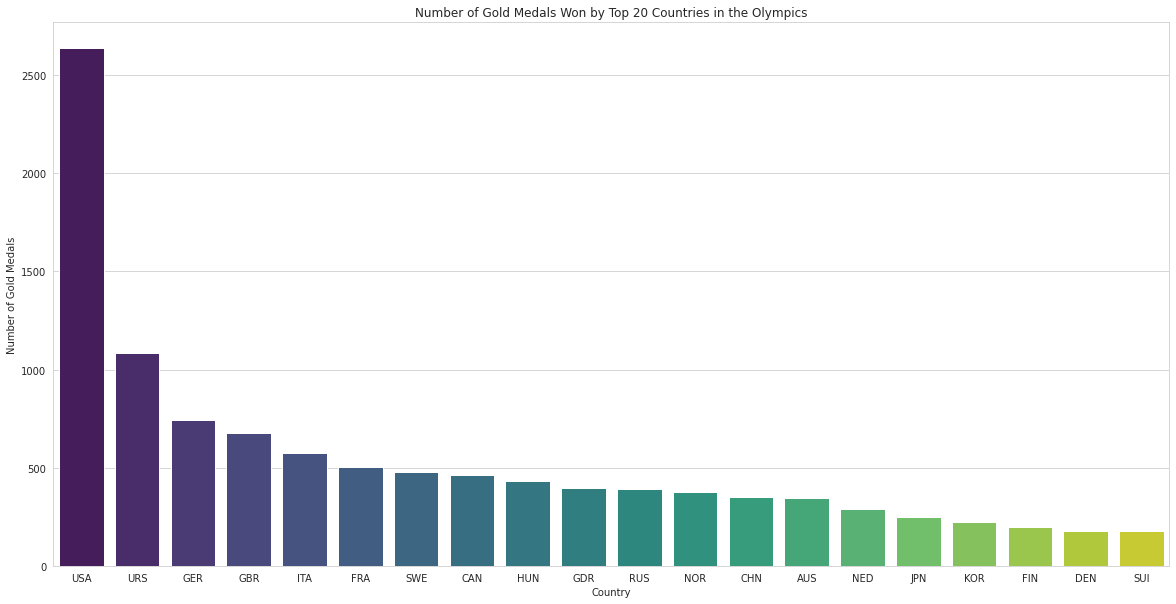

In [ ]:
gold_medals = data[data['Medal'] == 'Gold']
country_counts = gold_medals['NOC'].value_counts().reset_index(name='Medal Count')
country_counts.columns = ['Country', 'Medal Count']

plt.figure(figsize=(20, 10))
sns.barplot(data=country_counts.head(20), x='Country', y='Medal Count', palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Gold Medals')
plt.title('Number of Gold Medals Won by Top 20 Countries in the Olympics')
plt.show()

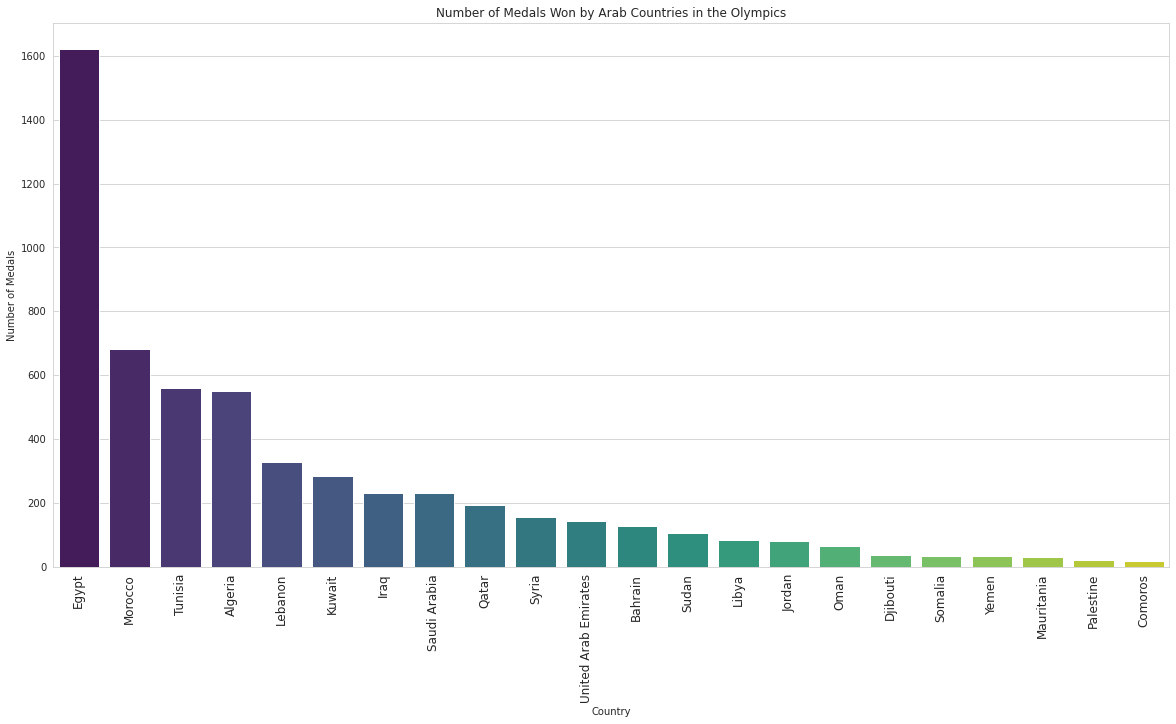

In [ ]:
arab_countries = ['Algeria', 'Bahrain', 'Comoros', 'Djibouti', 'Egypt', 'Iraq', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen']

arab_medals = data[data['Team'].isin(arab_countries)]

country_counts = arab_medals['Team'].value_counts().reset_index(name='Medal Count')
country_counts.columns = ['Country', 'Medal Count']

plt.figure(figsize=(20, 10))
sns.barplot(data=country_counts, x='Country', y='Medal Count', palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by Arab Countries in the Olympics')
plt.xticks(rotation=90, fontsize=12)
plt.show()


Top sports 

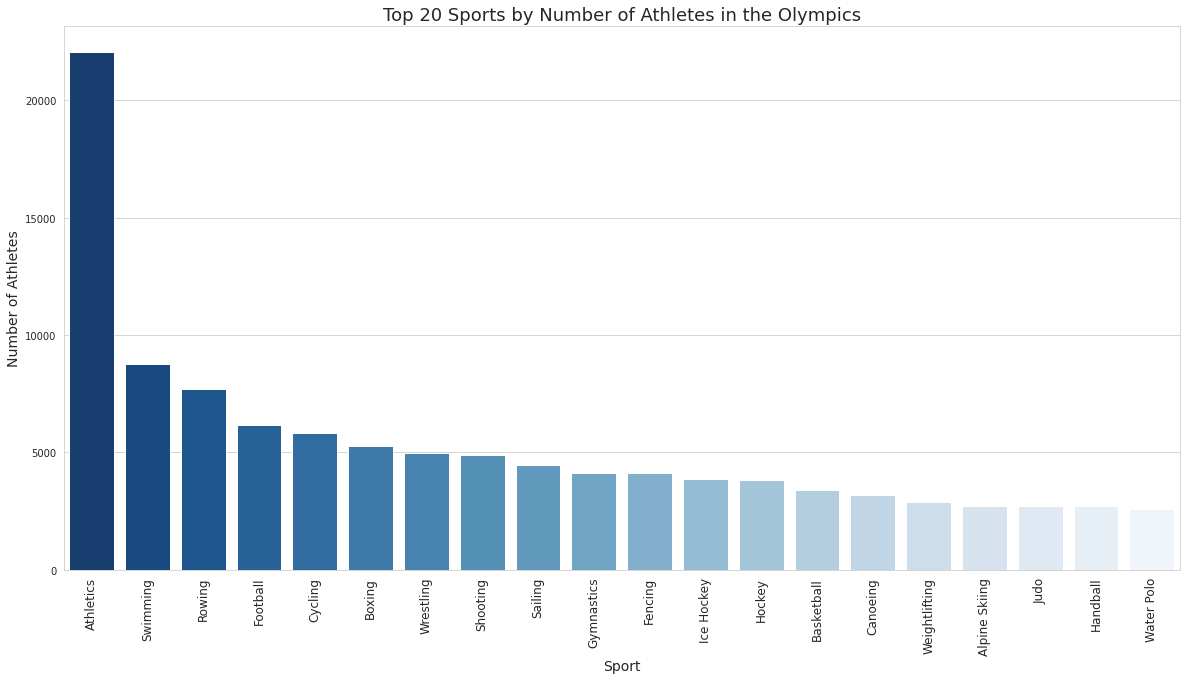

In [ ]:
sport_counts = data.groupby('Sport')['Name'].nunique().reset_index(name='Athlete Count')
sport_counts = sport_counts.sort_values(by='Athlete Count', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(data=sport_counts.head(20), x='Sport', y='Athlete Count', palette='Blues_r')
plt.xlabel('Sport', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)
plt.title('Top 20 Sports by Number of Athletes in the Olympics', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.show()


Top Athletes 

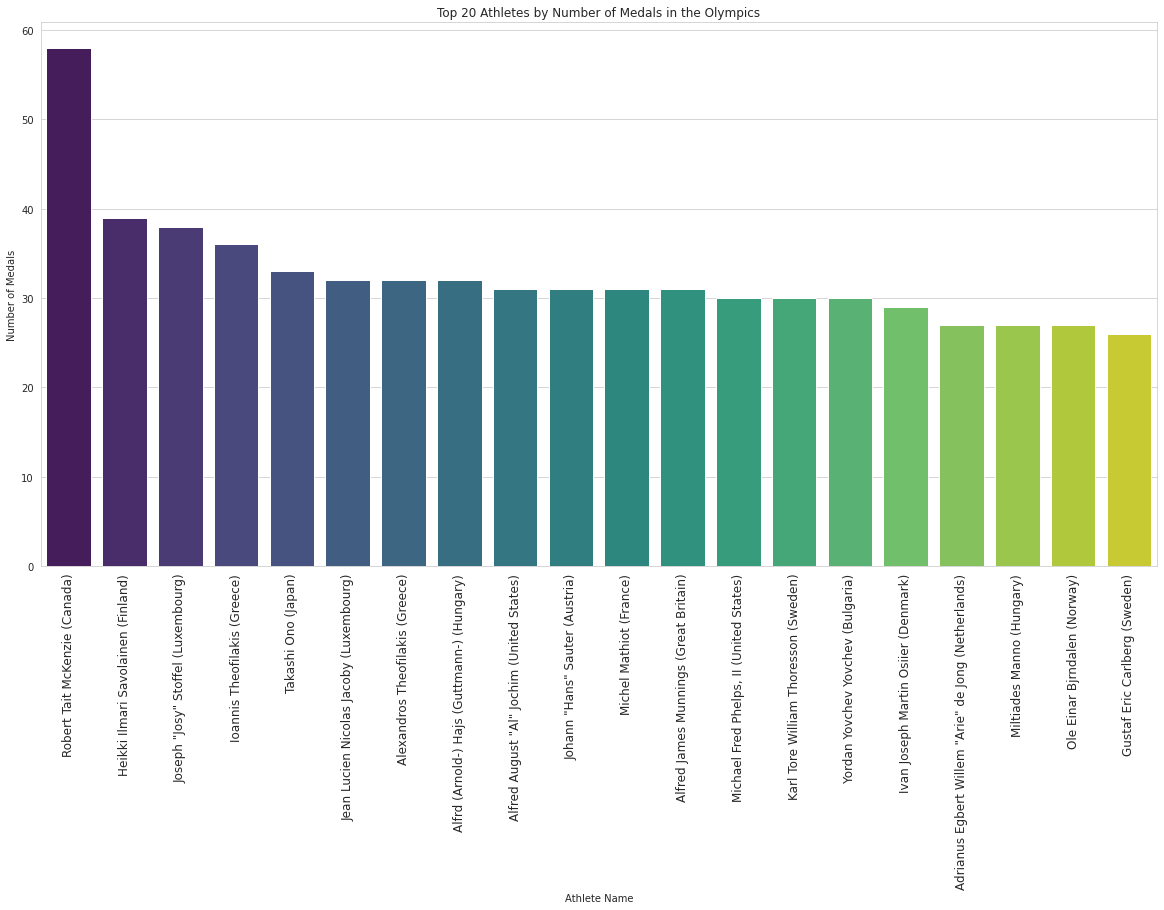

In [ ]:
medal_winner = data[data['Medal']!='No_Medal']
athlete_counts = data.groupby(['Name','Team'])['Medal'].count().reset_index(name='Medal Count')

athlete_counts['Athlete'] = athlete_counts['Name'] + ' (' + athlete_counts['Team'] + ')'

top_athletes = athlete_counts.sort_values('Medal Count', ascending=False).head(20)

plt.figure(figsize=(20, 10))
sns.barplot(data=top_athletes, x='Athlete', y='Medal Count', palette='viridis')
plt.xlabel('Athlete Name')
plt.ylabel('Number of Medals')
plt.title('Top 20 Athletes by Number of Medals in the Olympics')
plt.xticks(rotation=90, fontsize=12)
plt.show()


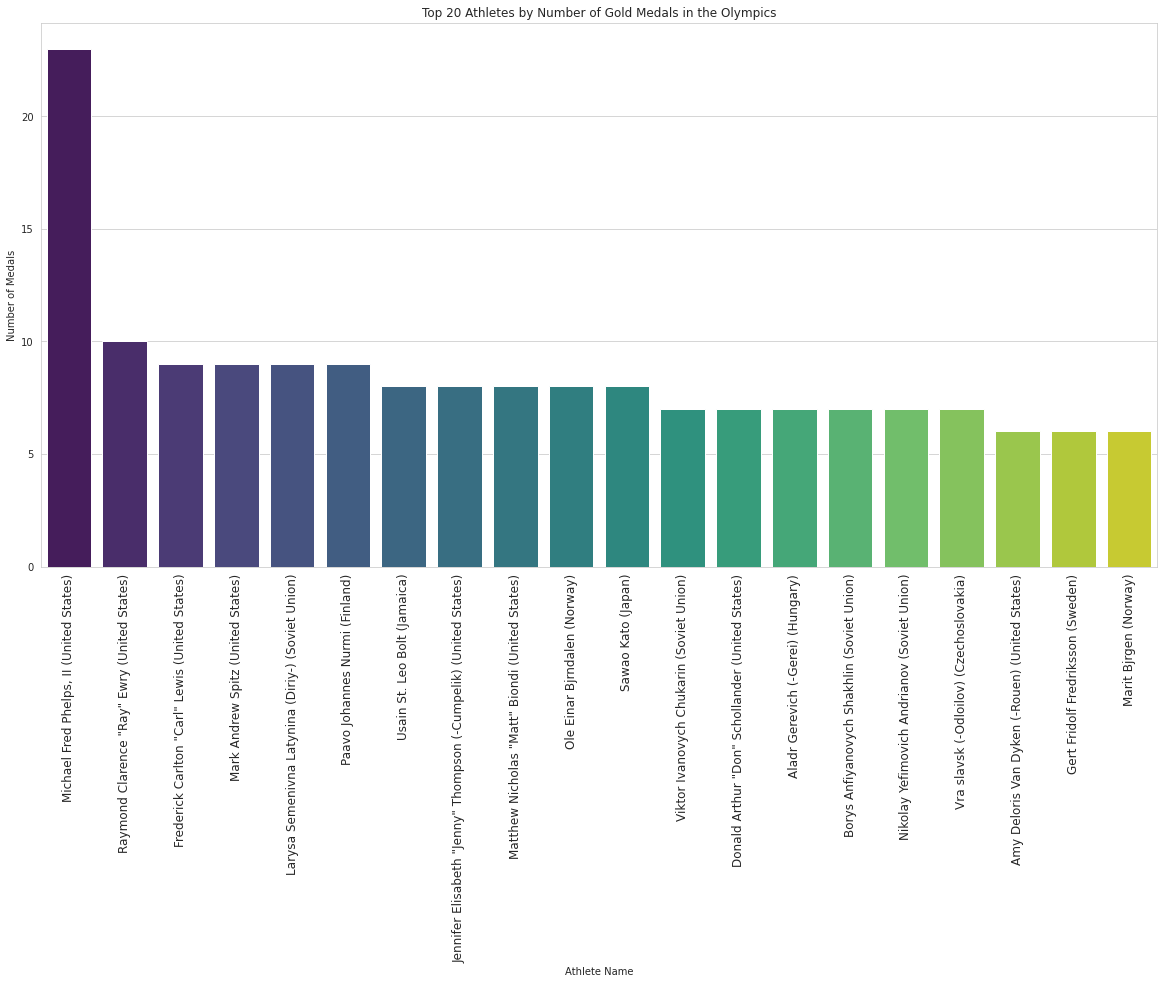

In [ ]:
gold_medals_only = data[data['Medal']=='Gold']

athlete_counts = gold_medals_only.groupby(['Name','Team'])['Medal'].count().reset_index(name='Medal Count')

athlete_counts['Athlete'] = athlete_counts['Name'] + ' (' + athlete_counts['Team'] + ')'

top_athletes = athlete_counts.sort_values('Medal Count', ascending=False).head(20)

plt.figure(figsize=(20, 10))
sns.barplot(data=top_athletes, x='Athlete', y='Medal Count', palette='viridis')
plt.xlabel('Athlete Name')
plt.ylabel('Number of Medals')
plt.title('Top 20 Athletes by Number of Gold Medals in the Olympics')
plt.xticks(rotation=90, fontsize=12)
plt.show()

Is their a relation between the Age of the athlete and how mush is his weight?

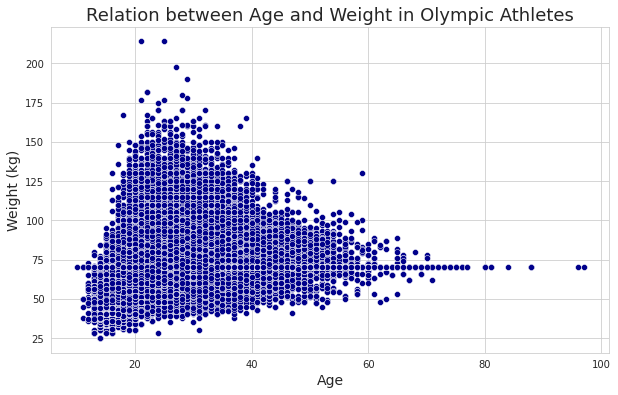

In [ ]:
age_weight_df = data[['Age', 'Weight']]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_weight_df, x='Age', y='Weight', color='darkblue')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.title('Relation between Age and Weight in Olympic Athletes', fontsize=18)
plt.show()